# demo04_ridge.ipynb    岭回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

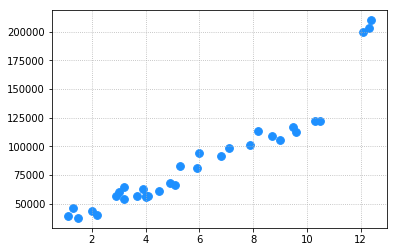

In [2]:
# 加载数据集  
data = pd.read_csv('Salary_Data2.csv')
x, y = data['YearsExperience'], data['Salary']
plt.grid(linestyle=':')
plt.scatter(x, y, s=60, color='dodgerblue', label='Samples')

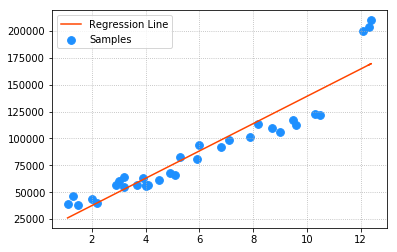

In [3]:
# 基于sklearn提供的API，训练线性回归模型
import sklearn.linear_model as lm
train_x, train_y = pd.DataFrame(x), y
model = lm.LinearRegression()
model.fit(train_x, train_y)
# 针对所有训练样本，执行预测操作， 绘制回归线
pred_train_y = model.predict(train_x)

# 可视化
plt.grid(linestyle=':')
plt.scatter(x, y, s=60, color='dodgerblue', label='Samples')
plt.plot(x, pred_train_y, color='orangered', label='Regression Line')
plt.legend()

# 找到一组测试样本数据，输出评估指标结果

In [4]:
test_x, test_y = train_x.iloc[::4], train_y[::4]
pred_test_y = model.predict(test_x) 
# 评估误差
import sklearn.metrics as sm
print(sm.mean_absolute_error(test_y, pred_test_y))
print(sm.mean_squared_error(test_y, pred_test_y))
print(sm.median_absolute_error(test_y, pred_test_y))
print(sm.r2_score(test_y, pred_test_y))

13057.8332542857
258803424.8304358
11652.23134862991
0.8923299505451808


## 训练一个岭回归模型

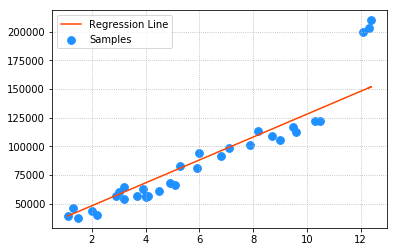

In [10]:
model = lm.Ridge(100)
model.fit(train_x, train_y)
# 针对所有训练样本，执行预测操作， 绘制回归线
pred_train_y = model.predict(train_x)

# 可视化
plt.grid(linestyle=':')
plt.scatter(x, y, s=60, color='dodgerblue', label='Samples')
plt.plot(x, pred_train_y, color='orangered', label='Regression Line')
plt.legend()

In [11]:
# 调整岭回归的参数
params = np.arange(60, 130, 5)
for param in params:
    model = lm.Ridge(param)
    model.fit(train_x, train_y)
    test_x, test_y = train_x.iloc[:30:4], train_y[:30:4]
    pred_test_y = model.predict(test_x) 
    # 评估误差
    print(param, '->', sm.r2_score(test_y, pred_test_y))

60 -> 0.9079377012464043
65 -> 0.9103517840843116
70 -> 0.9123556127607111
75 -> 0.9139751047288491
80 -> 0.9152344834900279
85 -> 0.9161564017114546
90 -> 0.9167620543385843
95 -> 0.9170712826050363
100 -> 0.9171026697534422
105 -> 0.9168736292005816
110 -> 0.9164004858087551
115 -> 0.9156985508615196
120 -> 0.9147821912848049
125 -> 0.9136648936032749
